<h3>Lab Assignment 2 - Classification</h3>
<h4>Garnett Grant</h4>
<h4>301188923</h4>

In [25]:
## Pre-requisite to carrying out the assignment:
## 1. From Sklearn load the MINST dataset, using fetch_openml.
from sklearn.datasets import fetch_openml
import sklearn as sl
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd

## Load & check the data:

In [ ]:

## 1. Load the MINST data into a pandas dataframe named MINST_firstname where first name is you name.
mnist_garnett = fetch_openml('mnist_784', version=1)

In [26]:
## 2. List the keys
mnist_garnett.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [27]:
## 3. Assign the data to a ndarray named X_firstname where firstname is your first name.
X_garnett = mnist_garnett["data"].values
X_garnett

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [28]:
## 4. Assign the target to a variable named y_firstname where firstname is your first name.
y_garnett = mnist_garnett["target"].values.astype(int)
y_garnett

array([5, 0, 4, ..., 4, 5, 6])

In [29]:
##5. Print the types of X_firstname and y_firstname.
print(type(X_garnett))
print(type(y_garnett))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [30]:
## 6. Print the shape of X_firstname and y_firstname.
print(f"X_garnett Shape: {X_garnett.shape}")
print(f"y_garnett Shape: {y_garnett.shape}")


X_garnett Shape: (70000, 784)
y_garnett Shape: (70000,)


In [31]:
##7. Create three variables named as follows:
##      a. If your first name starts by “A” through “L” name the variable some_digit1, some_digit2, some_digit3. 
##         Store in these variables the values from X_firstname indexed 7,5,0 in order.
some_digit1, some_digit2, some_digit3 = X_garnett[7], X_garnett[5], X_garnett[0]



In [32]:
## 8. Use imshow method to plot the values of the three variables you defined in the above point. Note the values in your Analysis report (written response).

##Data must first be reshaped and then plotted
some_digit1_image, some_digit2_image, some_digit3_image = some_digit1.reshape(28,28), some_digit2.reshape(28,28), some_digit3.reshape(28,28)

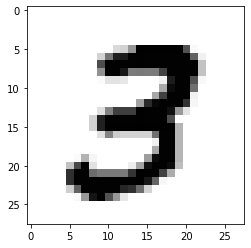

In [33]:
## Image 1
plt.imshow(some_digit1_image, cmap=mpl.cm.binary)

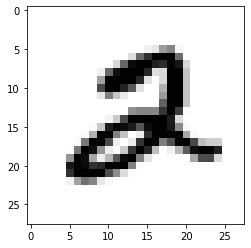

In [34]:
## Image 2
plt.imshow(some_digit2_image, cmap=mpl.cm.binary)

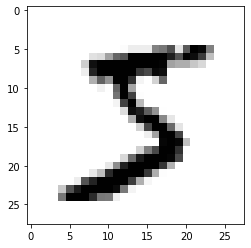

In [35]:
## Image 3
plt.imshow(some_digit3_image, cmap=mpl.cm.binary)

## Pre-process the data:


In [36]:
## 9. Change the type of y to uint8
y_garnett.dtype = "uint8"

In [37]:
## 10.	The current target values range from 0 to 9 i.e. 10 classes. Transform the target variable to 3 classes as follows:
##      a.	Any digit between 0 and 3 inclusive should be assigned a target value of 0
##      b.	Any digit between 4 and 6 inclusive should be assigned a target value of 1
##      c.	Any digit between 7 and 9 inclusive should be assigned a target value of 9 
##      (Hint: you can use numpy.where to carry out the transformation on the target.)
# y_garnett
y_garnett_transformed = np.where((y_garnett >= 0) & (y_garnett <= 3), 0, np.where((y_garnett >= 4) & (y_garnett <= 6), 1, 9))

# Verifying change of target values...
# pd.DataFrame(y_garnett).head(20)
# pd.DataFrame(y_garnett_transformed).head(20)


In [38]:
## 11.	Print the frequencies of each of the three target classes and note it in your written report in addition provide a screenshot showing a bar chart.

ygt_0_count = np.sum(y_garnett_transformed == 0)
ygt_1_count = np.sum(y_garnett_transformed == 1)
ygt_9_count = np.sum(y_garnett_transformed == 9)

print(f"y_garnett_transformed 0 Count: {ygt_0_count}\ny_garnett_transformed 1 Count: {ygt_1_count}\ny_garnett_transformed 9 count: {ygt_9_count}")



y_garnett_transformed 0 Count: 238911
y_garnett_transformed 1 Count: 20013
y_garnett_transformed 9 count: 21076


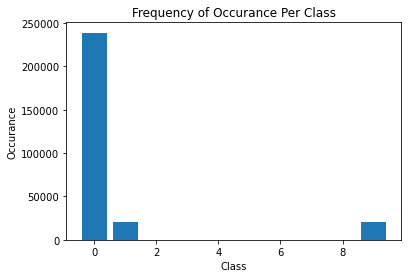

In [39]:

frequency = [10000,50000,100000,150000,200000,250000]
occurrences = [ygt_0_count,ygt_1_count,ygt_9_count]
classes = [0,1,9]

# plt.bar(occurrences, frequency, color='blue')

plt.bar(x=classes,height=occurrences)

plt.xlabel('Class')
plt.ylabel('Occurance')
plt.title('Frequency of Occurance Per Class')
# tick_positions = [0,1,2,3,4,5,6,7,8,9,10]
# plt.xticks([0,1,2,3,4,5,6,7,8,9,10])
# plt.yticks([20000,60000,100000,140000,180000,220000,260000])

plt.show()

In [41]:
## 12.	Split your data into train, test. Assign the first 50,000 records for training and the last 20,000
## records for testing. (Hint you don’t need sklearn train test as the data is already randomized).
X_garnett_train, X_garnett_test, y_garnett_train, y_garnett_test = X_garnett[:50000], X_garnett[-20000:], y_garnett_transformed[0:50000],y_garnett_transformed[-20000:]

X_garnett_train.size, X_garnett_test.size, y_garnett_train.size, y_garnett_test.size

(39200000, 15680000, 50000, 20000)

## Build Classification Models:

<blockquote><h3>Naive Bayes</h3></blockquote>

In [42]:
##13. Train a Naive Bayes classifier using the training data. Name the classifier NB_clf_firstname.
from sklearn.naive_bayes import GaussianNB, CategoricalNB,MultinomialNB, ComplementNB, BernoulliNB
NB_clf_garnett = BernoulliNB()

NB_clf_garnett.fit(X_garnett_train,y_garnett_train)

BernoulliNB()

In [43]:
## 14. Use 3-fold cross validation to validate the training process, and note the results in your written response.
from sklearn.model_selection import cross_val_score
scores = cross_val_score(NB_clf_garnett, X_garnett_train, y_garnett_train, cv=3, scoring="accuracy")
print (f'3-fold Cross Validations: {scores}')
print (f'Average score: {scores.mean() * 100}')

3-fold Cross Validations: [0.60208796 0.52108958 0.56300252]
Average score: 56.2060018850025


In [44]:
## 15.Use the model to score the accuracy against the test data, note the result in your written response.
from sklearn.metrics import accuracy_score
y_garnett_pred = NB_clf_garnett.predict(X_garnett_test)
accuracy = accuracy_score(y_garnett_test, y_garnett_pred)
accuracy


0.53875

In [45]:
## 16. Generate the accuracy matrix.
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

garnett_matrix = confusion_matrix(y_garnett_test, y_garnett_pred)
garnett_matrix
# disp = ConfusionMatrixDisplay(garnett_matrix)

# disp.plot()

array([[10038,  4089,  2969],
       [  722,   393,   299],
       [  715,   431,   344]], dtype=int64)

In [46]:
## 17. Use the classifier to predict the three variables you defined in point 7 above. Note the results in your written response and compare against the actual results.
test_rray = [some_digit1, some_digit2, some_digit3]
NB_clf_garnett.predict(test_rray)

array([0, 0, 0])

<blockquote><h3>Logisitic Regression</h3></blockquote>

In [47]:
#18. Train a Logistic regression classifier using the same training data. Name the classifier LR_clf_firstname. 
 
    #(Note this is a multi-class problem make sure to check all the parameters and set multi_class='multinomial').
    
    #Try training the classifier using two solvers first “lbfgs” then “Saga”. Set max_iter to 1200 and tolerance to 0.1 in both cases.
    
    #Make sure you note the results in both cases in your written response, and note the main differences in your #written response. Carryout a quick research on the difference between the “lbfgs” and “Saga” solvers and see #how this applies to the results, note that size and dimensions of the dataset. Don’t worry if one doesn’t converge your research should explain why. Note the results of your research in your analysis report.

from sklearn.linear_model import LogisticRegression

In [48]:
##lbfgs
## Limited-memory Broyden–Fletcher–Goldfarb–Shanno (LBFGS)
LR_clf_garnett_lbfgs = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1200, tol=0.1)
LR_clf_garnett_lbfgs.fit(X_garnett_train,y_garnett_train)

c:\Users\net_g\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1200, multi_class='multinomial', tol=0.1)

In [49]:
##saga
## Stochastic Average Gradient Descent (SAGA)
LR_clf_garnett_saga = LogisticRegression(multi_class='multinomial', solver='saga', max_iter=1200, tol=0.1)
LR_clf_garnett_saga.fit(X_garnett_train,y_garnett_train)

LogisticRegression(max_iter=1200, multi_class='multinomial', solver='saga',
                   tol=0.1)

In [ ]:
#19. Use 3-fold cross validation on the training data and note the results in your written response.

In [50]:
## 3-Fold Cross Validation Score for Logistic Regression Classifier utilziing lbfgs solver
scores_lr = cross_val_score(LR_clf_garnett_lbfgs, X_garnett_train, y_garnett_train, cv=3, scoring="accuracy")
scores_lr 

c:\Users\net_g\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\net_g\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

array([0.85162297, 0.85054299, 0.85089404])

In [51]:
scores_lr

array([0.85162297, 0.85054299, 0.85089404])

In [52]:
## 3-Fold Cross Validation Score for Logistic Regression Classifier utilizing saga solver
scores_saga = cross_val_score(LR_clf_garnett_saga, X_garnett_train, y_garnett_train, cv=3, scoring="accuracy")
scores_saga 

array([0.85336293, 0.85306294, 0.85287411])

In [ ]:
#20. Use the model to score the accuracy against the test data, note the result in your written response.

In [53]:
## Lbfgs accuracy
y_garnett_pred_lbfgs = LR_clf_garnett_lbfgs.predict(X_garnett_test)
accuracy_LR_clf_garnett_lbfgs = accuracy_score(y_garnett_test, y_garnett_pred_lbfgs)
accuracy_LR_clf_garnett_lbfgs


0.853

In [54]:
## Saga accuracy
y_garnett_pred_saga = LR_clf_garnett_saga.predict(X_garnett_test)
accuracy_LR_clf_garnett_saga = accuracy_score(y_garnett_test, y_garnett_pred_saga)
accuracy_LR_clf_garnett_saga


0.8543

In [55]:
# 21. Generate the Generate the accuracy matrix precision and recall of the model and note them in your written response.

##Accuracy Matrix saga
garnett_matrix_saga = confusion_matrix(y_garnett_test, y_garnett_pred_saga)
garnett_matrix_saga



array([[17086,     5,     5],
       [ 1414,     0,     0],
       [ 1490,     0,     0]], dtype=int64)

In [56]:
# Percision saga
from sklearn.metrics import precision_score, recall_score
precision_score(y_garnett_test, y_garnett_pred_saga, average='macro')

0.2849091212272803

In [57]:
#Recall saga
recall_score(y_garnett_test, y_garnett_pred_saga, average='macro')

0.33313835595070973

In [58]:
##Accuracy Matrix lbfgs
garnett_matrix_lbfgs = confusion_matrix(y_garnett_test, y_garnett_pred_lbfgs)
garnett_matrix_lbfgs

array([[17058,    22,    16],
       [ 1412,     1,     1],
       [ 1488,     1,     1]], dtype=int64)

In [59]:
# Percision lbfgs
from sklearn.metrics import precision_score, recall_score
precision_score(y_garnett_test, y_garnett_pred_lbfgs, average='macro')

0.31730569380885043

In [60]:
#Recall lbfgs
recall_score(y_garnett_test, y_garnett_pred_lbfgs, average='macro')

0.3330518707853963

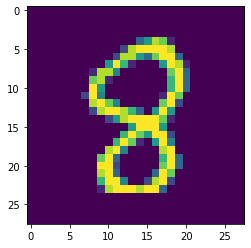

In [63]:
# 22. Use the classifier that worked from the above point to predict the three variables you defined in point 7 above. Note the results in your written response and compare against the actual results

## Lbfgs Solver
LR_clf_garnett_lbfgs.predict([some_digit1,some_digit2,some_digit3, X_garnett_test[604]])


plt.imshow(X_garnett_test[604].reshape(28,28))
